In [275]:
import pandas as pd 

In [276]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\sem 4\ml\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [277]:
print(df.columns
)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [278]:
# we dont need the id  of the customer 

In [279]:
df.drop('customerID',inplace=True,axis='columns')

In [280]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [281]:
# these are numbers expresed as string so we need to convert  it into 
df.TotalCharges.values      

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [282]:
# there are somevalue who have value  as " " 

In [283]:
df[df['TotalCharges']==' '].shape

(11, 20)

In [284]:
# i am droping the 11 rows  

In [285]:
df1=df[df['TotalCharges']!=' ']

In [286]:
df1.shape

(7032, 20)

In [287]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\3161509217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=df1['TotalCharges'].astype(float)


In [288]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [289]:
df1.Partner

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7032, dtype: object

In [290]:
# we can use this by converting it into 1 and 0   
def function(val):
    if val=="Yes":
        return 1
    else:
        return 0
    
df1['Partner']=df1['Partner'].apply(function)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\2056673151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Partner']=df1['Partner'].apply(function)


In [291]:
df1['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [292]:
df1["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\377869139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})


In [293]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,1,1,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,1,1,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,1,0,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [294]:
import seaborn as sns 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

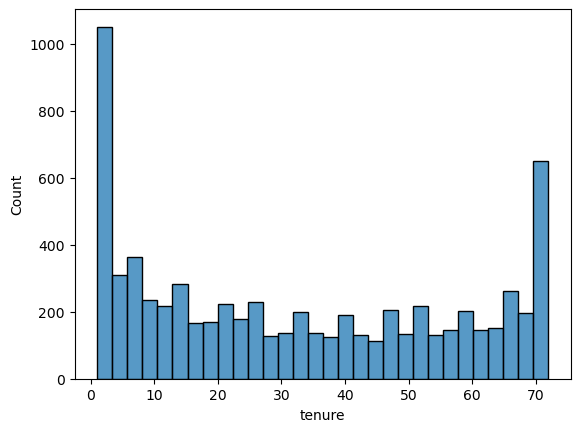

In [295]:
sns.histplot(data=df1,x='tenure',bins=30)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn', ylabel='Count'>

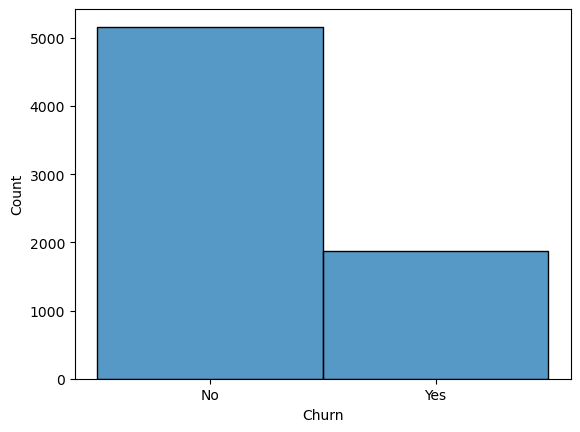

In [296]:
sns.histplot(data=df1,x='Churn',bins=30)

In [297]:
notenure=df[df['Churn']=='No']['tenure']

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

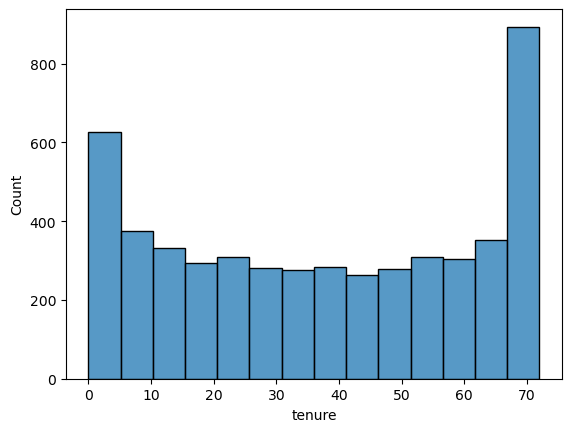

In [298]:
sns.histplot(data=notenure)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

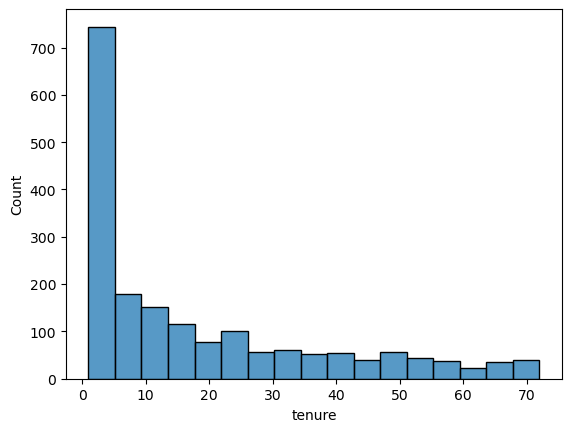

In [299]:
yestenure=df[df['Churn']=='Yes']['tenure']
sns.histplot(data=yestenure)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

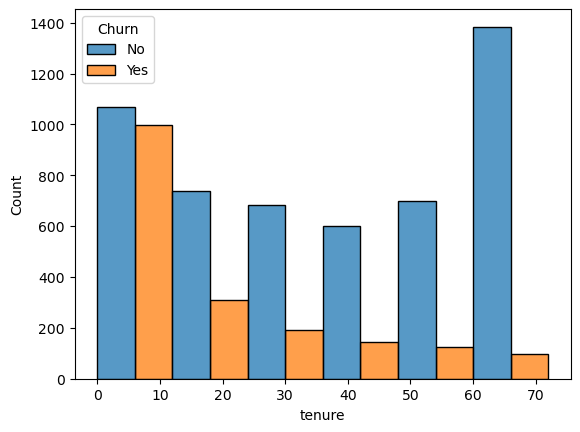

In [300]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='dodge', bins=6)

In [301]:
df2=df1

In [302]:
 df2.replace({'Yes': 1, 'No': 0},inplace=True) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\3771980731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'Yes': 1, 'No': 0},inplace=True)


In [303]:
df2.replace({'No phone service':0},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\1576001708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'No phone service':0},inplace=True)


In [304]:
df2.replace({'No internet service':0},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\2629728182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'No internet service':0},inplace=True)


In [305]:
df2['InternetService'].replace({0:'No'},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\1640075735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['InternetService'].replace({0:'No'},inplace=True)


In [306]:
c=df2.columns
for i in range(0,len(c)):
    k=df2[c[i]].unique()
    print(f"{c[i]}: {k}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [307]:
df2['MultipleLines'].unique()

array([0, 1], dtype=int64)

In [308]:
df2.replace({'No phone service':0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [309]:
df2['gender'].replace({'Female':0,'Male':1},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16428\3242707366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'].replace({'Female':0,'Male':1},inplace=True)


In [310]:
c=df2.columns
for i in range(0,len(c)):
    k=df2[c[i]].unique()
    print(f"{c[i]}: {k}")

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [311]:
df2=pd.get_dummies(data=df2,columns=['Contract','PaymentMethod','InternetService'],drop_first=True).astype(int)

df2

In [312]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,29,29,0,0,0,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,56,1889,0,1,0,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53,108,1,0,0,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,42,1840,0,1,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70,151,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84,1990,0,1,0,0,0,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,103,7362,0,1,0,1,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,29,346,0,0,0,0,1,0,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,74,306,1,0,0,0,0,1,1,0


In [313]:
df2.dtypes

gender                                   int32
SeniorCitizen                            int32
Partner                                  int32
Dependents                               int32
tenure                                   int32
PhoneService                             int32
MultipleLines                            int32
OnlineSecurity                           int32
OnlineBackup                             int32
DeviceProtection                         int32
TechSupport                              int32
StreamingTV                              int32
StreamingMovies                          int32
PaperlessBilling                         int32
MonthlyCharges                           int32
TotalCharges                             int32
Churn                                    int32
Contract_One year                        int32
Contract_Two year                        int32
PaymentMethod_Credit card (automatic)    int32
PaymentMethod_Electronic check           int32
PaymentMethod

In [314]:
df2.shape

(7032, 24)

In [315]:
# scallig 
df2['MonthlyCharges']

0        29
1        56
2        53
3        42
4        70
       ... 
7038     84
7039    103
7040     29
7041     74
7042    105
Name: MonthlyCharges, Length: 7032, dtype: int32

In [316]:
c=df2.columns
for i in range(0,len(c)):
    k=df2[c[i]].unique()
    print(f"{c[i]}: {k}")

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [ 29  56  53  42  70  99  89 104  49  18 100 103 105 113  20 106  55  90
  39  19  59  30  64  96  95  66  45  69  74  97  79  76  84  80 108  24
 107  54  94  75  78 111 110  25  50  62  33  82  21  98  57  91  31  85
  88  23  58  35  44  71 101  68  86  73  81  51 109 112 102  46  93  65
  48  40  83 115 114  41  61  60  67  72  87  92 116  43  28  63  47  34
  26  52  77  36  38 118 117  22  37]
TotalCharges: [  29 1889  108 ... 1990 7362 6844]
Churn: [0 1]
Contract_One year: [0 1]
Contr

In [317]:
cols=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()
df2[cols]=scaler.fit_transform(df2[cols])

In [318]:
c=df2.columns
for i in range(0,len(c)):
    k=df2[c[i]].max()
    y=df2[c[i]].min()
    print(f"{c[i]}:{k}-{y}")

gender:1-0
SeniorCitizen:1-0
Partner:1-0
Dependents:1-0
tenure:1.0-0.0
PhoneService:1-0
MultipleLines:1-0
OnlineSecurity:1-0
OnlineBackup:1-0
DeviceProtection:1-0
TechSupport:1-0
StreamingTV:1-0
StreamingMovies:1-0
PaperlessBilling:1-0
MonthlyCharges:1.0-0.0
TotalCharges:1.0-0.0
Churn:1-0
Contract_One year:1-0
Contract_Two year:1-0
PaymentMethod_Credit card (automatic):1-0
PaymentMethod_Electronic check:1-0
PaymentMethod_Mailed check:1-0
InternetService_Fiber optic:1-0
InternetService_No:1-0


In [319]:
# all the values are now from one to zero   

In [320]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [321]:
import tensorflow as tf
from tensorflow import keras

In [322]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),  # Fixed input_shape
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Fixed 'metrics'

model.fit(xtrain, ytrain, epochs=10)


Epoch 1/10


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6873 - loss: 0.5810
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7926 - loss: 0.4368
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.4082
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4178
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4224
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4125
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8033 - loss: 0.4156
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8098 - loss: 0.4107
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8035 - loss: 0.4173
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.3992


In [323]:
model.evaluate(xtest,ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7928 - loss: 0.4323


[0.4450226426124573, 0.7839374542236328]

In [324]:
yp=model.predict(xtest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [325]:
ytest


2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int32

In [327]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(ytest,ypp))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(0.5, 1.0, 'Confusion Matrix')

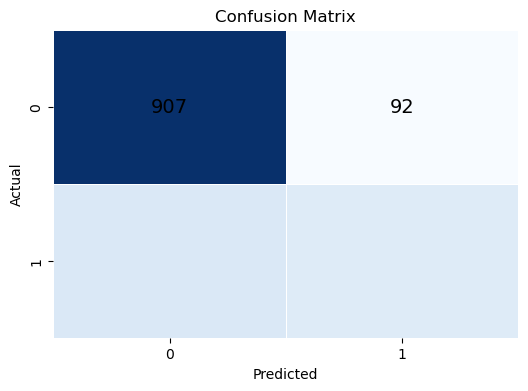

In [329]:
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypp)

# Plot the heatmap
plt.figure(figsize=(6, 4))  # Adjust figure size if needed
sns.heatmap(cm.numpy(), annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False, annot_kws={"size": 14, "color": "black"})

# Labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")